In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten


In [2]:
IMAGE_SIZE = 32
BATCH_SIZE = 32
CHANNELS = 3

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory (
 "EuroSAT", shuffle = True, image_size = (IMAGE_SIZE, IMAGE_SIZE), batch_size = BATCH_SIZE)

Found 27000 files belonging to 10 classes.


In [4]:
class_names = dataset.class_names
class_names

['AnnualCrop',
 'Forest',
 'HerbaceousVegetation',
 'Highway',
 'Industrial',
 'Pasture',
 'PermanentCrop',
 'Residential',
 'River',
 'SeaLake']

In [5]:
len(dataset)

844

In [6]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 32, 32, 3)
[2 3 7 5 4 7 0 7 9 3 0 0 5 7 7 7 6 4 8 0 4 7 7 6 2 2 9 2 8 1 3 5]


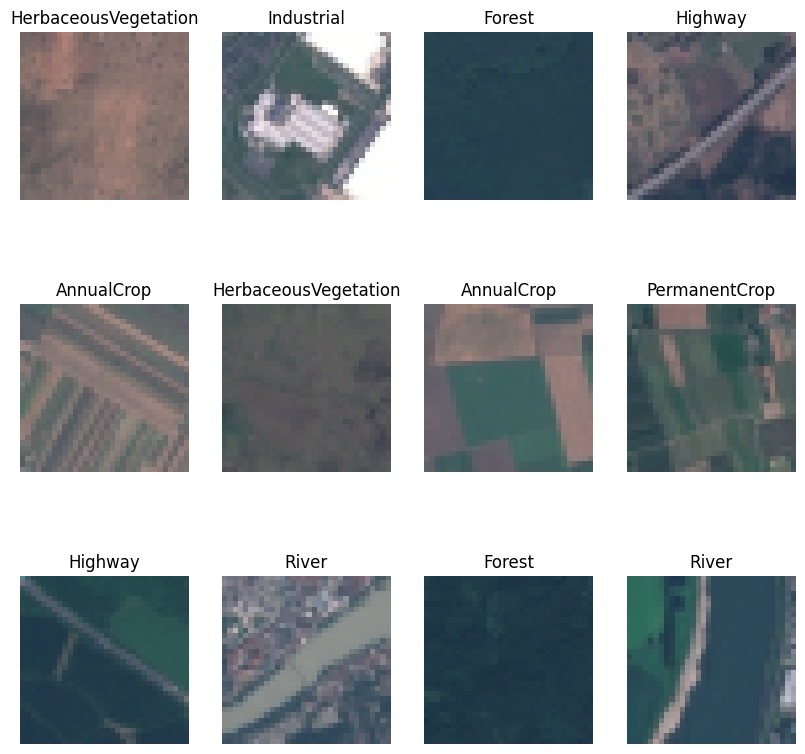

In [7]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")



In [8]:
# 80% ==> traning
# 20% ==> validation, 10% test

In [9]:
train_size = 0.8
len(dataset)*train_size

675.2

In [10]:
train_ds = dataset.take(675)
len(train_ds)

675

In [11]:
temp_ds = dataset.skip(675)
len(temp_ds)


169

In [12]:
val_size = 0.1
len(dataset)*val_size
val_ds = temp_ds.take(84)
len(val_ds)


84

In [13]:
test_ds = temp_ds.skip(84)
len(test_ds)

85

In [14]:
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split = 0.1 , test_split = 0.1, shuffle = True, shuffle_size = 10000):
    
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds 

In [15]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [16]:
len(train_ds)

675

In [17]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [20]:
# rollnumbers_based_CNN_model = 364844 --> 448463 

input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

def createModel():
    model = Sequential()
    # The first two layers with 32 filters of window size 3x3 as 4-1 =3
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    
    model.add(Conv2D(64, (7, 7), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (5, 5), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    
    return model

In [21]:
model1 = createModel()
batch_size = 32
epochs = 15
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        100416    
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                      

In [22]:
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
history = model1.fit(train_ds, epochs = epochs, batch_size = batch_size, verbose = 1, validation_data = val_ds)

Epoch 1/15
675/675 [==============================] - 243s 331ms/step - loss: 1.7805 - accuracy: 0.3310 - val_loss: 1.2812 - val_accuracy: 0.4959
Epoch 2/15
675/675 [==============================] - 204s 303ms/step - loss: 1.2694 - accuracy: 0.5440 - val_loss: 1.0577 - val_accuracy: 0.6205
Epoch 3/15
675/675 [==============================] - 204s 302ms/step - loss: 1.0277 - accuracy: 0.6438 - val_loss: 0.8382 - val_accuracy: 0.7065
Epoch 4/15
675/675 [==============================] - 208s 308ms/step - loss: 0.9022 - accuracy: 0.6885 - val_loss: 0.6575 - val_accuracy: 0.7760
Epoch 5/15
675/675 [==============================] - 201s 297ms/step - loss: 0.8670 - accuracy: 0.7062 - val_loss: 0.7039 - val_accuracy: 0.7533
Epoch 6/15
675/675 [==============================] - 202s 300ms/step - loss: 0.7940 - accuracy: 0.7286 - val_loss: 0.6750 - val_accuracy: 0.7571
Epoch 7/15
675/675 [==============================] - 199s 295ms/step - loss: 0.7942 - accuracy: 0.7330 - val_loss: 0.6621 -

In [24]:
model1.evaluate(train_ds)

675/675 [==============================] - 56s 83ms/step - loss: 0.4336 - accuracy: 0.8449


[0.4336189329624176, 0.8448962569236755]

In [25]:
model1.evaluate(val_ds)

84/84 [==============================] - 7s 81ms/step - loss: 0.4554 - accuracy: 0.8371


[0.4554365277290344, 0.8370535969734192]

In [26]:
model1.evaluate(test_ds)

85/85 [==============================] - 22s 93ms/step - loss: 0.4725 - accuracy: 0.8423


[0.47253525257110596, 0.8422794342041016]

Text(0.5, 1.0, 'Loss Curves')

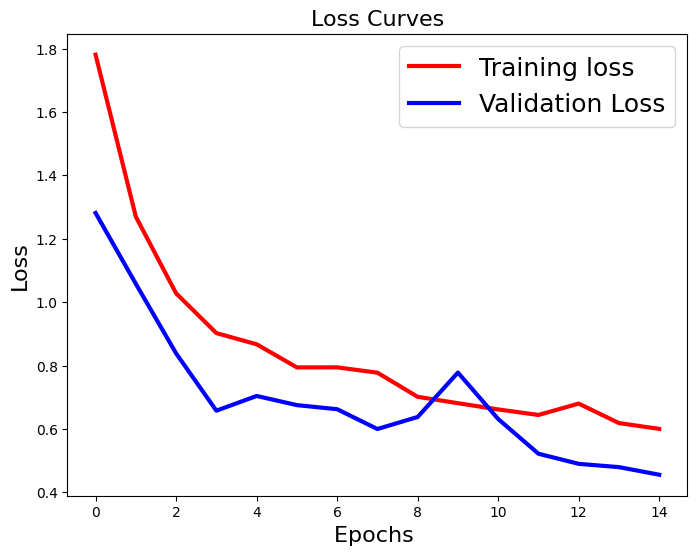

In [27]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
     

Text(0.5, 1.0, 'Accuracy Curves')

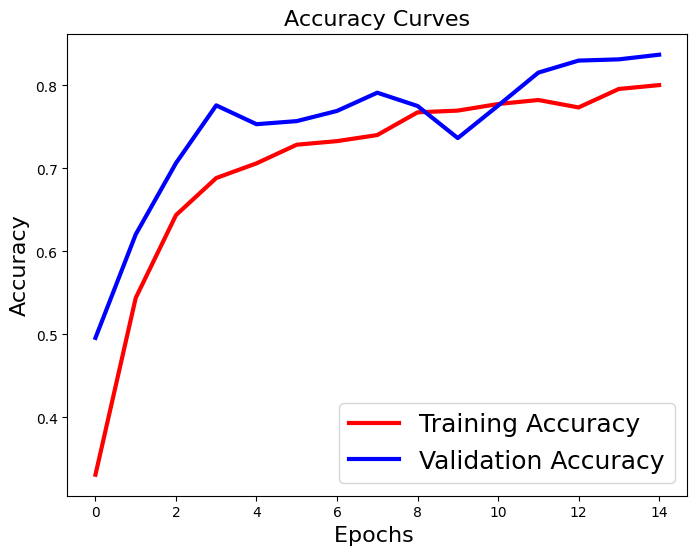

In [28]:
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)   

# Predictions

In [29]:
prediction = model1.predict(test_ds)

85/85 [==============================] - 7s 83ms/step


In [30]:
prediction[0]

array([4.03243910e-10, 1.96214018e-15, 5.48296236e-03, 6.13079919e-03,
       9.80383098e-01, 1.09180456e-10, 2.94093712e-04, 7.70768151e-03,
       1.42422084e-06, 4.30752337e-15], dtype=float32)

In [31]:
import numpy as np

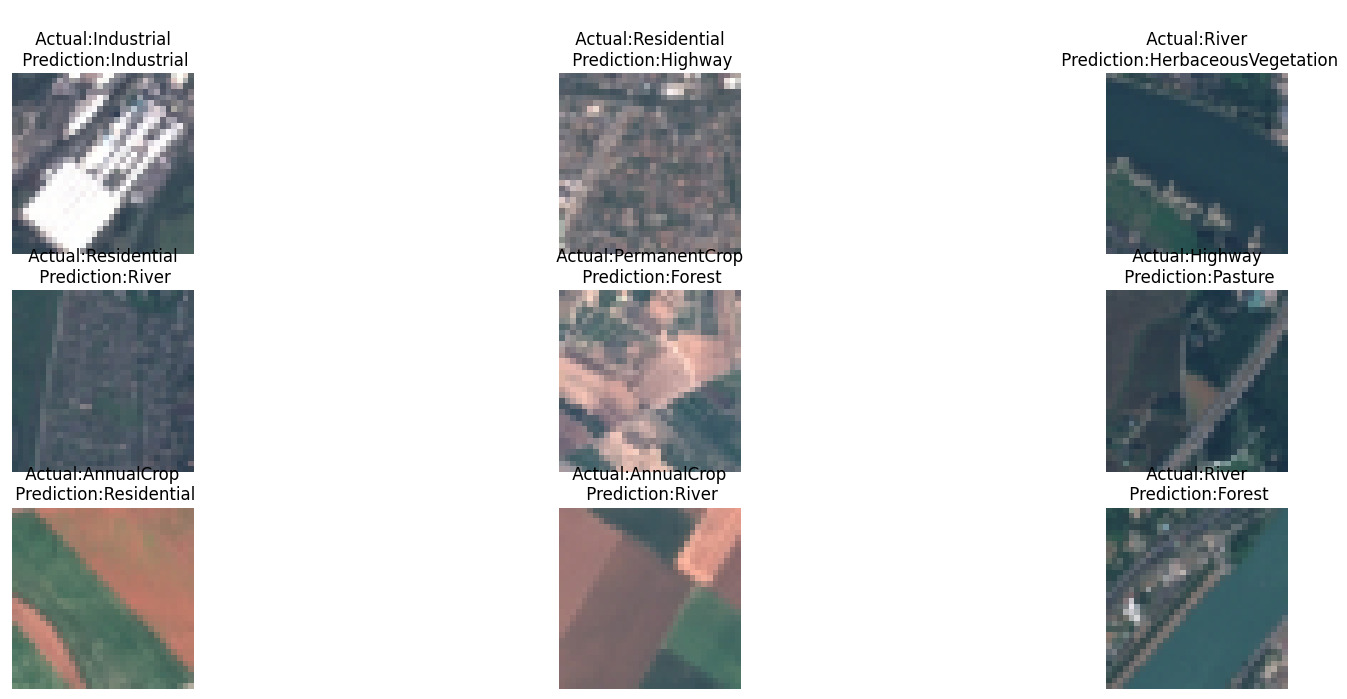

In [33]:
plt.figure(figsize=(20,8))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"\n Actual:{class_names[labels[i]]} \n Prediction:{class_names[np.argmax(prediction[i])]}")
        plt.axis("off")